In [ ]:
# 2020A 3) 4)结果

In [15]:
import numpy as np

In [16]:
# Celsius
T15 = 175
T6 = 195
T7 = 235
T89 = 255
T1011 = 25
T_env = 25

In [17]:
# centimeter
stove_env = 25
small_room = 30.5
room_interval = 5

In [18]:
T_stove_bs_dif = [
    stove_env,
    small_room * 5 + room_interval * 4, # 1-5 without the last interval
    room_interval, # 5 interval
    small_room, # 6 room
    room_interval, # 6 interval
    small_room, # 7 room
    room_interval, # 7 interval
    small_room * 2 + room_interval, # 8-9 without the last interval
    room_interval, # 9 interval
    small_room * 2 + room_interval, # 10-11 without the last interval
    room_interval + stove_env # 11 interval and the stove-env area
]

In [19]:
T_stove_bs = [0]
for each in T_stove_bs_dif:
    T_stove_bs.append(T_stove_bs[-1] + each)
T_stove_bs

[0, 25, 197.5, 202.5, 233.0, 238.0, 268.5, 273.5, 339.5, 344.5, 410.5, 440.5]

In [20]:
len(T_stove_bs)

12

In [21]:
def T_air(x):
    if T_stove_bs[0] <= x <= T_stove_bs[1]:
        slope = (T15 - T_env) / (T_stove_bs[1] - T_stove_bs[0])
        return slope * (x - T_stove_bs[0]) + T_env
    elif T_stove_bs[1] < x <= T_stove_bs[2]:
        return T15
    elif T_stove_bs[2] < x <= T_stove_bs[3]:
        slope = (T6 - T15) / (T_stove_bs[3] - T_stove_bs[2])
        return slope * (x - T_stove_bs[2]) + T15
    elif T_stove_bs[3] < x <= T_stove_bs[4]:
        return T6
    elif T_stove_bs[4] < x <= T_stove_bs[5]:
        slope = (T7 - T6) / (T_stove_bs[5] - T_stove_bs[4])
        return slope * (x - T_stove_bs[4]) + T6
    elif T_stove_bs[5] < x <= T_stove_bs[6]:
        return T7
    elif T_stove_bs[6] < x <= T_stove_bs[7]:
        slope = (T89 - T7) / (T_stove_bs[7] - T_stove_bs[6])
        return slope * (x - T_stove_bs[6]) + T7
    elif T_stove_bs[7] < x <= T_stove_bs[8]:
        return T89
    elif T_stove_bs[8] < x <= T_stove_bs[9]:
        slope = (T1011 - T89) / (T_stove_bs[9] - T_stove_bs[8])
        return slope * (x - T_stove_bs[8]) + T89
    elif T_stove_bs[9] < x <= T_stove_bs[10]:
        return T1011
    elif T_stove_bs[10] < x <= T_stove_bs[11]:
        slope = (T1011 - T_env) / (T_stove_bs[11] - T_stove_bs[10])
        return slope * (x - T_stove_bs[10]) + T1011

<Axes: >

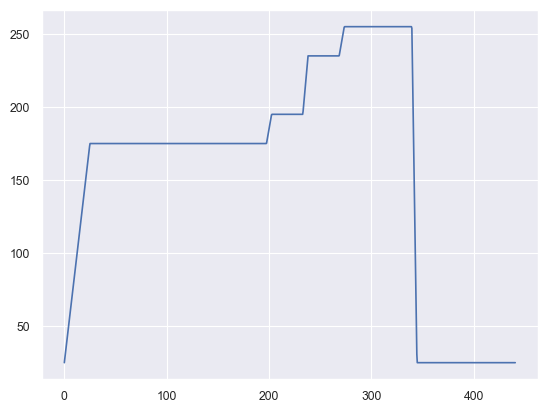

In [22]:
# Plot T for x
import seaborn as sns
sns.set_theme("paper")
x = np.linspace(0, 440.5, 1000)
y = np.vectorize(T_air)(x)
sns.lineplot(x=x, y=y)

In [23]:
def get_seg(pos):
    for i in range(1, len(T_stove_bs)):
        if pos < T_stove_bs[i]:
            return int(i - 1)
    return int(len(T_stove_bs) - 1)

In [24]:
dt = 0.1

In [25]:
def cal(speed):
    speed /= 60
    # cm / min -> cm / s
    theta = np.array([532.23876665,  54.55804656,  51.51008425,  60.64395191,
        73.58904021,  48.13889706, 306.98201478,  36.52734275,
        423.53293641, 168.02540902,  66.58185161,  47.14781481])
    time = T_stove_bs[-1] / speed
    n_ = int(time / dt)
    T = np.zeros(n_)
    T.fill(T_env)
    theta_over_dt = theta / dt
    for t_ in range(1, n_):
        pos = t_ * dt * speed
        T_a = T_air(pos)
        t = theta_over_dt[get_seg(pos)]
        T[t_] = (T_a + T[t_ - 1] * t) / (1 + t)
    return T

In [26]:
speed = 80

In [31]:
# simulated annealing

# iterations = 20000
# sim_T = 4050
# sim_T_step = 0.2
# extra_loss = 1e8

iterations = 200000
sim_T = 22
sim_T_step = 0.0001
extra_loss = 1e8

last_loss = 1e10

sigma = 1

for i in range(iterations):
    """
    # Celsius
    T15 = 175
    T6 = 195
    T7 = 235
    T89 = 255
    T1011 = 25
    T_env = 25
    """
    backup_speed, backup_T15, backup_T6, backup_T7, backup_T89, backup_T1011 = speed, T15, T6, T7, T89, T1011
    speed += np.random.normal(0, sigma)
    T15 += np.random.normal(0, sigma)
    T6 += np.random.normal(0, sigma)
    T7 += np.random.normal(0, sigma)
    T89 += np.random.normal(0, sigma)
    T1011 += np.random.normal(0, sigma)
    """上述实验设定温度的基础上，各小温区设定温度可以进行\pm10ºC"""
    """speed within 65~100 """
    speed = np.clip(speed, 65, 100)
    """T15 within 175+-10 """
    T15 = np.clip(T15, 165, 185)
    """T6 within 195+-10 """
    T6 = np.clip(T6, 185, 205)
    """T7 within 235+-10 """
    T7 = np.clip(T7, 225, 245)
    """T89 within 255+-10 """
    T89 = np.clip(T89, 245, 265)
    """T1011 within 25+-10 """
    T1011 = np.clip(T1011, 15, 35)
    def loss():
        r = 0
        prediction = cal(speed)
        slope_max = np.diff(prediction).max() / dt
        slope_min = np.diff(prediction).min() / dt
        time_within_150_190 = np.sum((prediction > 150) & (prediction < 190)) * dt
        time_above_217 = np.sum(prediction > 217) * dt
        peak = prediction.max()
        if slope_max <= 3 and slope_min >= -3 and time_within_150_190 >= 60 and time_within_150_190 <= 120 and time_above_217 >= 40 and time_above_217 <= 90 and peak >= 240 and peak <= 250:
            r += 0
        else:
            r += extra_loss
        """
        理想的炉温曲线应使超过217ºC到峰值温度所覆盖的面积（图2中阴影部分）最小。
        """
        r += np.sum(np.clip(prediction - 217, 0, None)) * dt
        """
        还希望以峰值温度为中心线的两侧超过217ºC的炉温曲线应尽量对称
        """
        over_217 = prediction[prediction >= 217]
        reversed_over_217 = over_217[::-1]
        r += np.sum(np.abs(over_217 - reversed_over_217)) * dt
        return r
    l = loss() 
    delta = l - last_loss
    if delta < 0 or np.random.random() < np.exp(-delta / sim_T):
        last_loss = l
    else:
        speed, T15, T6, T7, T89, T1011 = backup_speed, backup_T15, backup_T6, backup_T7, backup_T89, backup_T1011
    sim_T -= sim_T_step
    if i % (iterations // 20) == 0:
        print(f"""
            iteration: {i}
            speed: {speed}
            T15: {T15}
            T6: {T6}
            T7: {T7}
            T89: {T89}
            T1011: {T1011}
            loss: {l}
                """)


            iteration: 0
            speed: 83.14772352428413
            T15: 168.3121115700164
            T6: 188.2002466556926
            T7: 225.0
            T89: 259.05571359429814
            T1011: 28.565216526610644
            loss: 778.8362733600004
                

            iteration: 10000
            speed: 96.88354187729324
            T15: 181.87723072028027
            T6: 185.98172678977997
            T7: 227.4091041030453
            T89: 265.0
            T1011: 32.541977638805
            loss: 100000607.37082388
                

            iteration: 20000
            speed: 96.053354619629
            T15: 177.51650616568267
            T6: 187.05220676412992
            T7: 234.99810765946881
            T89: 263.97316582460473
            T1011: 21.169664368135745
            loss: 654.0053035817124
                

            iteration: 30000
            speed: 95.00085395697322
            T15: 169.39676221276045
            T6: 186.16810748715258

In [32]:
last_loss

626.9495131407625

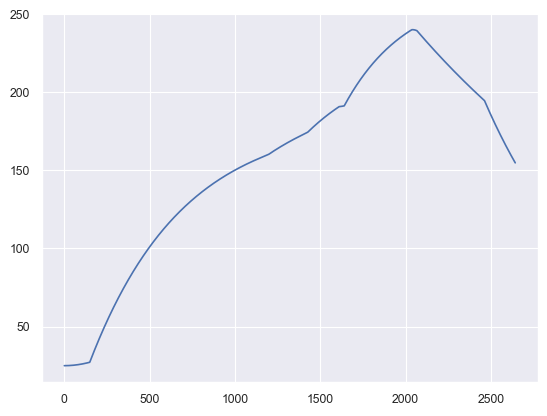

In [33]:
import matplotlib.pyplot as plt
T_result = cal(speed)
plt.plot(T_result)

<Axes: >

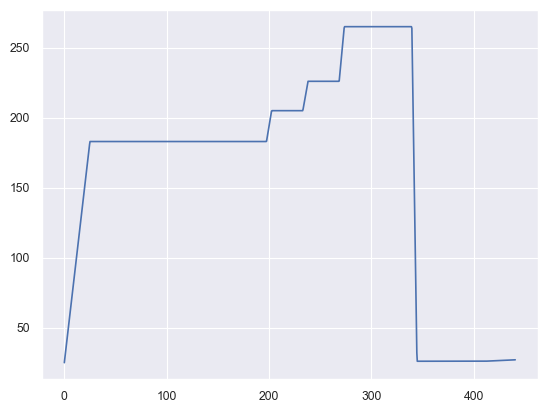

In [34]:
# Plot T for x
import seaborn as sns
sns.set_theme("paper")
x = np.linspace(0, 440.5, 1000)
y = np.vectorize(T_air)(x)
sns.lineplot(x=x, y=y)